<a href="https://colab.research.google.com/github/01-vyom/Machine-Learning-Projects/blob/master/Kaggle/iWildCam%202020/iwildcam_2020_demo_kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import json
import os
from IPython.display import FileLink
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [0]:
with open('/kaggle/input/iwildcam-2020-fgvc7/iwildcam2020_train_annotations.json') as f:
    train_data = json.load(f)
    
with open('/kaggle/input/iwildcam-2020-fgvc7/iwildcam2020_test_information.json') as f:
    test_data = json.load(f)

In [0]:
train_data.keys()

dict_keys(['annotations', 'images', 'categories', 'info'])

In [0]:
train = pd.DataFrame(train_data['annotations'])

In [0]:
train.head()

,count,image_id,id,category_id
0,1,96b00332-21bc-11ea-a13a-137349068a90,a292dd3c-21bc-11ea-a13a-137349068a90,73
1,1,879d74d8-21bc-11ea-a13a-137349068a90,a0afcfc0-21bc-11ea-a13a-137349068a90,4
2,1,9017f7aa-21bc-11ea-a13a-137349068a90,a306e9c0-21bc-11ea-a13a-137349068a90,227
3,1,90d93c58-21bc-11ea-a13a-137349068a90,9eed94c4-21bc-11ea-a13a-137349068a90,250
4,1,887cd0ec-21bc-11ea-a13a-137349068a90,a2a4dd7a-21bc-11ea-a13a-137349068a90,2


In [0]:
train.rename(columns={'count': 'cnt'}, inplace=True)


In [0]:
train[train.cnt > 1].describe()

,cnt,category_id
count,41160.000000,41160.000000
mean,4.875389,178.521380
std,5.386858,144.690983
min,2.000000,2.000000
25%,2.000000,71.000000
50%,3.000000,99.000000
75%,5.000000,372.000000
max,80.000000,565.000000


In [0]:
train.describe()

,cnt,category_id
count,217959.000000,217959.000000
mean,1.444974,144.334067
std,2.912934,167.486502
min,-1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,71.000000
75%,1.000000,347.000000
max,80.000000,571.000000


In [0]:
train_img = pd.DataFrame(train_data['images'])

In [0]:
indices1 = []
indices2 = []
indices1.append( train[ train['image_id'] == '896c1198-21bc-11ea-a13a-137349068a90' ].index )
indices1.append( train[ train['image_id'] == '8792549a-21bc-11ea-a13a-137349068a90' ].index )
indices1.append( train[ train['image_id'] == '87022118-21bc-11ea-a13a-137349068a90' ].index )
indices1.append( train[ train['image_id'] == '98a295ba-21bc-11ea-a13a-137349068a90' ].index )
indices2.append( train_img[ train_img['id'] == '896c1198-21bc-11ea-a13a-137349068a90' ].index )
indices2.append( train_img[ train_img['id'] == '8792549a-21bc-11ea-a13a-137349068a90' ].index )
indices2.append( train_img[ train_img['id'] == '87022118-21bc-11ea-a13a-137349068a90' ].index )
indices2.append( train_img[ train_img['id'] == '98a295ba-21bc-11ea-a13a-137349068a90' ].index )

for _id in train_img[train_img['location'] == 537]['id'].values:
    indices1.append( train[ train['image_id'] == _id ].index )
    indices2.append(train_img[ train_img['id'] == _id ].index)
for the_index in indices1:
    train = train.drop(train.index[the_index])
for the_index in indices2:
    train_img = train_img.drop(train_img.index[the_index])


In [0]:
train_img.head()

,seq_num_frames,location,datetime,id,frame_num,seq_id,width,height,file_name
0,1,267,2013-08-08 11:45:00.000,96b00332-21bc-11ea-a13a-137349068a90,1,96b004ea-21bc-11ea-a13a-137349068a90,1795,1222,96b00332-21bc-11ea-a13a-137349068a90.jpg
1,1,264,2013-08-01 22:31:00.000,879d74d8-21bc-11ea-a13a-137349068a90,1,879d7654-21bc-11ea-a13a-137349068a90,2739,1772,879d74d8-21bc-11ea-a13a-137349068a90.jpg
2,1,45,2013-04-17 11:15:00.000,9017f7aa-21bc-11ea-a13a-137349068a90,1,9017f8cc-21bc-11ea-a13a-137349068a90,1891,1222,9017f7aa-21bc-11ea-a13a-137349068a90.jpg
3,1,45,2013-04-23 08:26:00.000,90d93c58-21bc-11ea-a13a-137349068a90,1,90d93e38-21bc-11ea-a13a-137349068a90,1795,1222,90d93c58-21bc-11ea-a13a-137349068a90.jpg
4,1,45,2013-04-24 13:51:00.000,887cd0ec-21bc-11ea-a13a-137349068a90,1,887cd29a-21bc-11ea-a13a-137349068a90,1812,1196,887cd0ec-21bc-11ea-a13a-137349068a90.jpg


Text(0.5, 1.0, 'distribution of number of data per category')

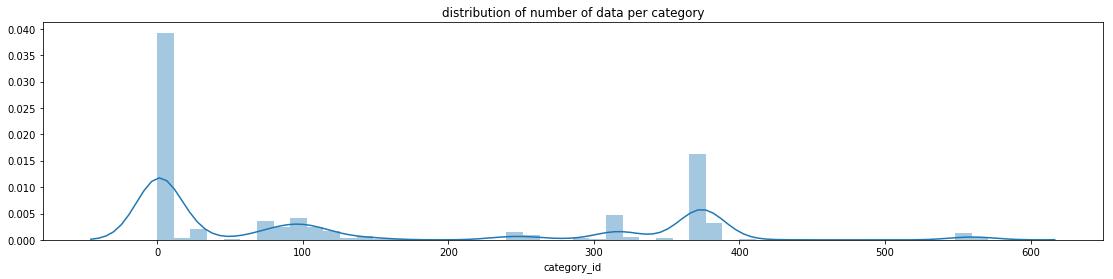

In [0]:
fig = plt.figure(figsize=(19, 4))
ax = sns.distplot(train['category_id'])
plt.title('distribution of number of data per category')

Text(0.5, 1.0, 'distribution of count per id')

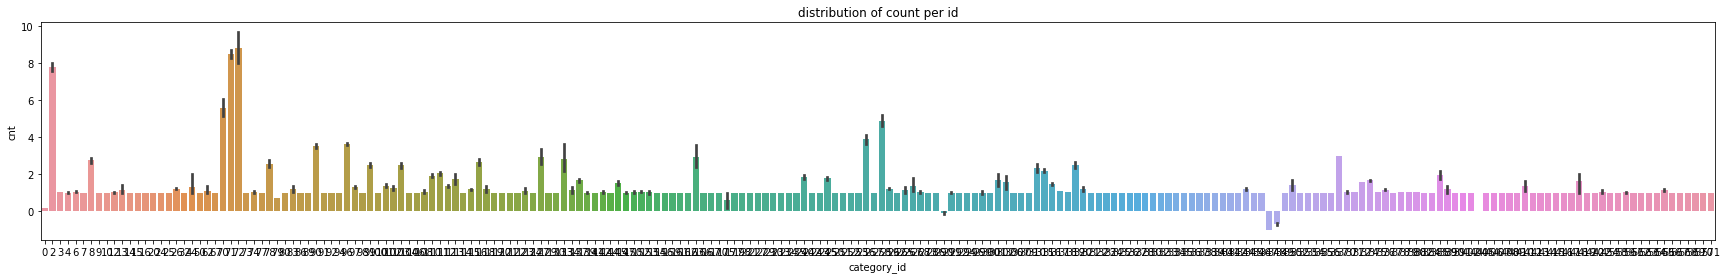

In [0]:
fig = plt.figure(figsize=(30, 4))
ax = sns.barplot(x="category_id", y="cnt",data=train)
plt.title('distribution of count per id')

Text(0.5, 1.0, 'distribution of number of animals by location')

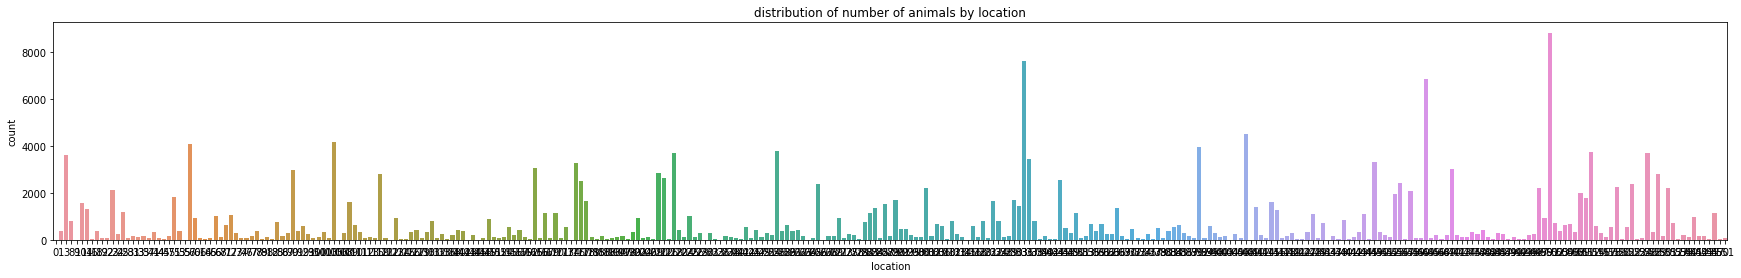

In [0]:
fig = plt.figure(figsize=(30, 4))
ax = sns.countplot(train_img['location'])
plt.title('distribution of number of animals by location')

In [0]:
labels_month = sorted(list(set(train_img['datetime'].map(lambda str: str[5:7]))))
# fig, ax = plt.subplots(1,2, figsize=(20,7)
plt.title('Count of train data per month')
ax = sns.countplot(train_img['datetime'].map(lambda str: str[5:7] ), order=labels_month)
ax.set(xlabel='Month', ylabel='count')
# ax.set(ylim=(0,55000))

In [0]:
train_img.describe()

,seq_num_frames,location,frame_num,width,height
count,217914.000000,217914.000000,217914.000000,217914.000000,217914.000000
mean,34.139115,310.306272,20.739241,1830.577719,1262.520719
std,237.602445,162.787175,189.008182,310.847071,249.826925
min,-1.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,176.000000,-1.000000,1920.000000,1080.000000
50%,3.000000,336.000000,1.000000,1920.000000,1080.000000
75%,10.000000,464.000000,5.000000,2048.000000,1536.000000
max,3899.000000,551.000000,3899.000000,3565.000000,2226.000000


In [0]:
train.describe()

,cnt,category_id
count,217914.000000,217914.000000
mean,1.445244,144.358830
std,2.913168,167.491941
min,-1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,71.000000
75%,1.000000,347.000000
max,80.000000,571.000000


In [0]:
train_img = train_img
train = train

In [0]:
train_img['category'] = train['category_id']

In [0]:
train_img.drop(train_img.columns.difference(['file_name','category']), 1, inplace=True)

In [0]:
train_img['category'] = train_img['category'].apply(str)

In [0]:
train_img.head()

,file_name,category
0,96b00332-21bc-11ea-a13a-137349068a90.jpg,73
1,879d74d8-21bc-11ea-a13a-137349068a90.jpg,4
2,9017f7aa-21bc-11ea-a13a-137349068a90.jpg,227
3,90d93c58-21bc-11ea-a13a-137349068a90.jpg,250
4,887cd0ec-21bc-11ea-a13a-137349068a90.jpg,2


In [0]:
train_img[ train_img['file_name'] == '883572ba-21bc-11ea-a13a-137349068a90.jpg' ].index

Int64Index([123653], dtype='int64')

In [0]:
train_img.drop(123658,inplace=True)

In [0]:
train_img.drop(123651,inplace=True)

In [0]:
train_img.drop(123653,inplace=True)

In [0]:
# !pip install tensorflow-gpu==1.14.0
# !pip install keras==2.2.4

In [0]:

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
# import pickle
import dill
from tqdm import tqdm

from os import makedirs
from os.path import expanduser, exists, join

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip = True,    
    zoom_range = 0.3,
    width_shift_range = 0.3,
    height_shift_range=0.3,
   rotation_range = 40,
   shear_range = 0.3,
   channel_shift_range=150.0,
   fill_mode='nearest',
   brightness_range=(0.2, 0.9)
)
# (max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4,
#                       p_affine=1., p_lighting=1.

In [0]:
train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_img[90000:120000],
        directory='/kaggle/input/iwildcam-2020-fgvc7/train',
        x_col="file_name",
        y_col="category",
        target_size=(150,150),
        batch_size=256,
        classes = train_img['category'].unique().tolist(),
        class_mode='categorical')

Found 30000 validated image filenames belonging to 216 classes.


In [0]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

In [0]:
print(labels)

{0: '0', 1: '10', 2: '100', 3: '101', 4: '102', 5: '103', 6: '104', 7: '106', 8: '108', 9: '110', 10: '111', 11: '112', 12: '113', 13: '114', 14: '115', 15: '116', 16: '118', 17: '119', 18: '12', 19: '120', 20: '121', 21: '122', 22: '123', 23: '124', 24: '127', 25: '129', 26: '13', 27: '130', 28: '133', 29: '134', 30: '137', 31: '139', 32: '14', 33: '141', 34: '142', 35: '144', 36: '145', 37: '147', 38: '15', 39: '150', 40: '152', 41: '153', 42: '154', 43: '156', 44: '159', 45: '16', 46: '161', 47: '162', 48: '163', 49: '166', 50: '167', 51: '170', 52: '175', 53: '177', 54: '198', 55: '2', 56: '20', 57: '221', 58: '227', 59: '229', 60: '230', 61: '233', 62: '234', 63: '235', 64: '24', 65: '240', 66: '242', 67: '243', 68: '245', 69: '25', 70: '250', 71: '251', 72: '252', 73: '253', 74: '256', 75: '257', 76: '258', 77: '259', 78: '26', 79: '262', 80: '265', 81: '267', 82: '268', 83: '273', 84: '286', 85: '290', 86: '291', 87: '292', 88: '294', 89: '296', 90: '299', 91: '3', 92: '300', 93

In [0]:
# cache_dir = expanduser(join('~', '.keras'))
# if not exists(cache_dir):
#     makedirs(cache_dir)
# models_dir = join(cache_dir, 'models')
# if not exists(models_dir):
#     makedirs(models_dir)
    
# !cp ../input/keras-pretrained-models/*notop* ~/.keras/models/
# !cp ../input/keras-pretrained-models/imagenet_class_index.json ~/.keras/models/
# !cp ../input/keras-pretrained-models/resnet50* ~/.keras/models/

In [0]:
!ls ../input/keras-pretrained-models/ 

In [0]:
# !git clone https://github.com/qubvel/efficientnet.git

In [0]:
# import efficientnet.efficientnet.tfkeras as efn

In [0]:
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [0]:
pre_trained_model = tf.keras.applications.InceptionV3(include_top=False,input_shape = (150, 150, 3),
                                                weights='../input/keras-pretrained-models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [0]:
# pre_trained_model = efn.EfficientNetB7(weights='imagenet', include_top=False, pooling='avg', input_shape=(96, 96, 3))

In [0]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [0]:
# x = pre_trained_model.output
# predictions = Dense(573, activation="softmax")(x)
# model = Model(inputs=pre_trained_model.input, outputs=predictions)

In [0]:
model = Sequential()
    # first (and only) set of FC => RELU layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(216,activation='softmax'))

In [0]:
pretrainedInput = pre_trained_model.input
pretrainedOutput = pre_trained_model.output
output = model(pretrainedOutput)
model = Model(pretrainedInput, output)

In [0]:
model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

In [0]:
history = new_model.fit_generator(
        train_generator,
        steps_per_epoch=train_generator.n//train_generator.batch_size+1,
        epochs=5,
        shuffle = True,
        verbose = 1)

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy vs epochs')
plt.legend(loc=0)
plt.figure()


plt.show()

In [0]:
new_model.save('Modeln.h5')

In [0]:
FileLink('Modeln.h5')

In [0]:
test = pd.DataFrame(test_data['images'])

In [0]:
test.head()

In [0]:
test.describe()

In [0]:
test_data.keys()

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255.)


In [0]:
test_generator = test_datagen.flow_from_dataframe(
        dataframe=test,
        directory='/kaggle/input/iwildcam-2020-fgvc7/test',
        x_col="file_name",
        target_size=(150, 150),
        batch_size=64,class_mode=None)

In [0]:
new_model = tf.keras.models.load_model('/kaggle/input/model-1/Modeln.h5')

In [0]:
preds = new_model.predict_generator(test_generator,
steps=test_generator.n//test_generator.batch_size+1,
verbose=1)

In [0]:
predicted_class_indices=np.argmax(preds,axis=1)

In [0]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [0]:
Id=test.id

In [0]:
results=pd.DataFrame({"Id":Id,
                      "Category":predictions})

In [0]:
submission = pd.read_csv('/kaggle/input/iwildcam-2020-fgvc7/sample_submission.csv')
submission = submission.drop(['Category'], axis=1)
submission = submission.merge(results, on='Id')
submission.to_csv('modeln.csv', index=False)

In [0]:
FileLink('modeln.csv')

In [0]:

# results.to_csv("results.csv",index=False)